In [1]:
%matplotlib inline
from pylab import *
import caffe

solver = caffe.SGDSolver('./solver3.prototxt')
niter = 4000
test_interval = 400
# losses will also be stored in the log
train_loss = zeros(niter)
test_acc = zeros(int(np.ceil(niter / test_interval)))
# output = zeros((niter, 8, 38))

# the main solver loop
for it in range(niter):
    solver.step(1)  # SGD by Caffe

    # store the train loss
    train_loss[it] = solver.net.blobs['loss'].data

    # store the output on the first test batch
    # (start the forward pass at conv1 to avoid loading new data)
#     solver.test_nets[0].forward(start='conv1')
#     output[it] = solver.test_nets[0].blobs['score'].data[:8]

    # run a full test every so often
    # (Caffe can also do this for us and write to a log, but we show here
    #  how to do it directly in Python, where more complicated things are easier.)
    if it % test_interval == 0:
        print 'Iteration', it, 'testing...'
        correct = 0
        for test_it in range(100):
            solver.test_nets[0].forward()
            correct += sum(solver.test_nets[0].blobs['fc2'].data.argmax(1)
                           == solver.test_nets[0].blobs['label'].data)
        test_acc[it // test_interval] = correct / 1000.0
        print correct / 1000.0



Iteration 0 testing...
0.037
Iteration 400 testing...
0.288
Iteration 800 testing...
0.435
Iteration 1200 testing...
0.462
Iteration 1600 testing...
0.489
Iteration 2000 testing...
0.527
Iteration 2400 testing...
0.562
Iteration 2800 testing...
0.573
Iteration 3200 testing...
0.578
Iteration 3600 testing...
0.575


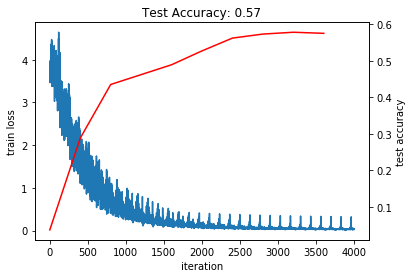

In [2]:
_, ax1 = subplots()
ax2 = ax1.twinx()
ax1.plot(arange(niter), train_loss)
ax2.plot(test_interval * arange(len(test_acc)), test_acc, 'r')
ax1.set_xlabel('iteration')
ax1.set_ylabel('train loss')
ax2.set_ylabel('test accuracy')
ax2.set_title('Test Accuracy: {:.2f}'.format(test_acc[-1]))